In [288]:
# COMP386: Computational Neuroscience
# Receptive Field HW, due 9/28/2018
#Angie Georgaras, Carolina Cervantes, Pragna Bhatt

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pylab as py
import math


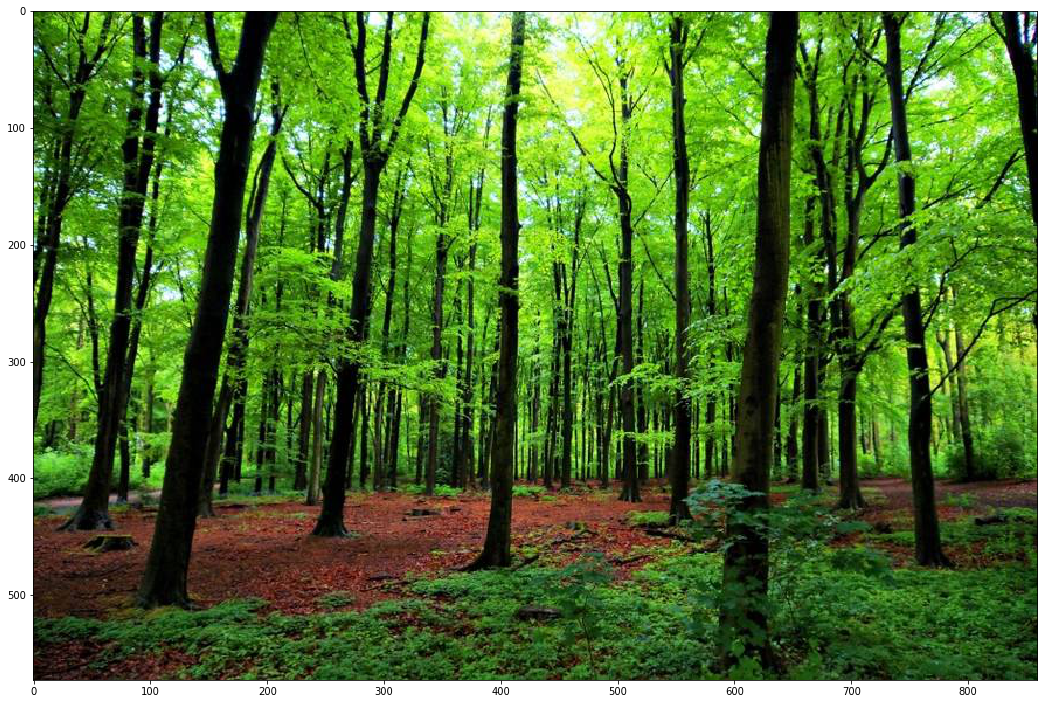

In [277]:
img=mpimg.imread('tree.jpg')
fig = py.figure(figsize=(18, 20))
imgplot = plt.imshow(img)

In [278]:
#below is the code dr.albert gave us! slightly modified with tree image

In [279]:
def gaborCalc(x, y, sx, sy, fx, fy):
    p1 = (1 / (2 * math.pi * sx * sy))
    p2 = math.exp(-0.5 * (((x * x) / (sx * sx)) + ((y * y) / (sy * sy))))
    p3 = math.cos(2 * math.pi * (fx * x + fy * y))
    return p1 * p2 * p3

In [280]:
def gaborFilter(sizeX=16, sizeY=16, sx=2.0, sy=3.5, fx=0.2, fy=0.0):
    return [[gaborCalc(x - 7.5, y - 7.5, sx, sy, fx, fy) for x in range(sizeX)] for y in range(sizeY)]

In [281]:
gabor_filter = gaborFilter()

In [282]:
print('mean before centering:', np.mean(gabor_filter))
gabor_filter = np.array(gabor_filter)
pos_ind = gabor_filter >= 0
neg_ind = gabor_filter < 0
pos_sum = np.sum(gabor_filter[pos_ind])
neg_sum = np.sum(gabor_filter[neg_ind])
gabor_filter[neg_ind] = - pos_sum / neg_sum * gabor_filter[neg_ind]
gabor_filter = list(gabor_filter)
print('mean after centering:', np.mean(gabor_filter))

mean before centering: 0.0001624293991828799
mean after centering: 1.6263032587282567e-19


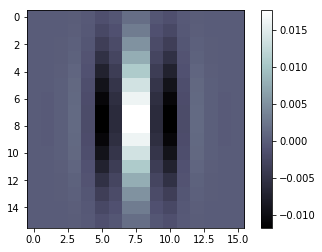

In [283]:
py.imshow(gabor_filter)
py.colorbar()

In [284]:
img=mpimg.imread('tree.jpg')
img=img[:,:,0]

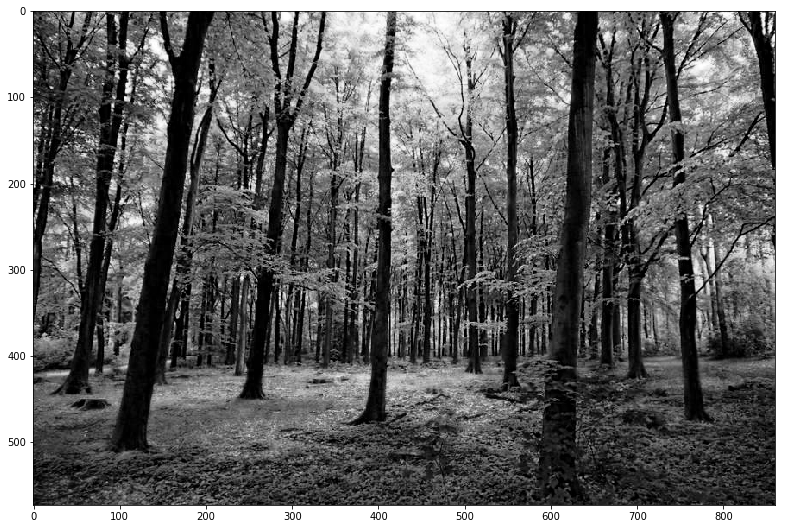

In [285]:
fig = py.figure(figsize=(18, 20))
fig.add_subplot(2, 1, 1)
imgplot = plt.imshow(img, cmap=py.cm.Greys_r)

In [286]:
from scipy import ndimage
fig.savefig("pic4.pdf")
print(img)

[[  9  13  28 ... 142 156 174]
 [ 19   8   9 ... 148 217 229]
 [ 25  27  29 ... 178 228 206]
 ...
 [ 54  40  25 ...   0  14  33]
 [ 45  30  17 ...   0   0  15]
 [ 28  16  11 ...   5   3  14]]


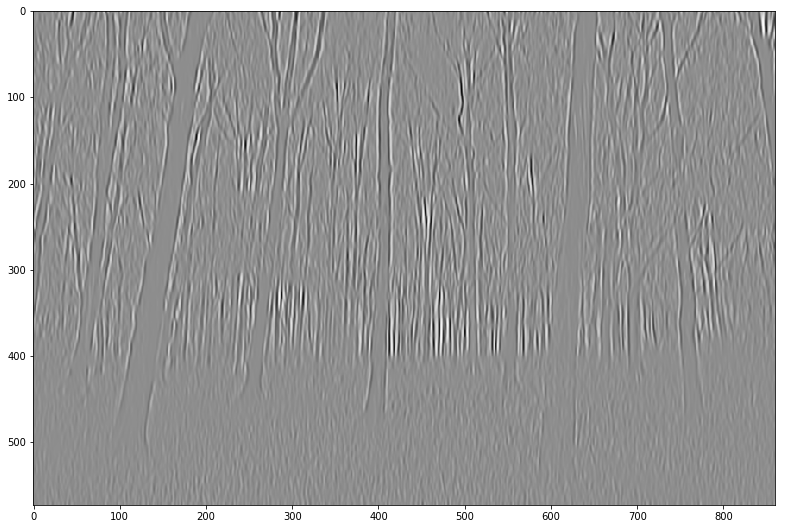

In [287]:
# Convolve with the gabor filter
img_gabor = ndimage.convolve(img, gabor_filter, mode='reflect', cval=0.0)
img_gabor = ndimage.convolve(img.astype(float), gabor_filter, mode='reflect', cval=0.0)
fig = py.figure(figsize=(18, 20))
fig.add_subplot(2, 1, 2)
py.imshow(img_gabor, cmap=py.cm.Greys_r)
